In [1]:
import import_ipynb
import pandas as pd
from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt  # To visualize
from matplotlib import dates as mdate
from sklearn.linear_model import LinearRegression

from BabiloniaDataAnalytics import BabiloniaDataAnalytics
bda = BabiloniaDataAnalytics('../../server/app/config.json')
HALF_HOUR=60
muxes = ['MUX0','MUX1','MUX2','MUX3','MUX4','MUX5','MUX7']

importing Jupyter notebook from BabiloniaDataAnalytics.ipynb


In [2]:
bda.plot_node_moisture()
# Range: 1608951600 – 1609037999 => 26/12/2020 (entire day)

In [3]:
signal = bda.NODE_MOISTURE_DATA[(bda.NODE_MOISTURE_DATA.index > 1608951600) & (bda.NODE_MOISTURE_DATA.index < 1609037999)].rolling(HALF_HOUR).mean().dropna()


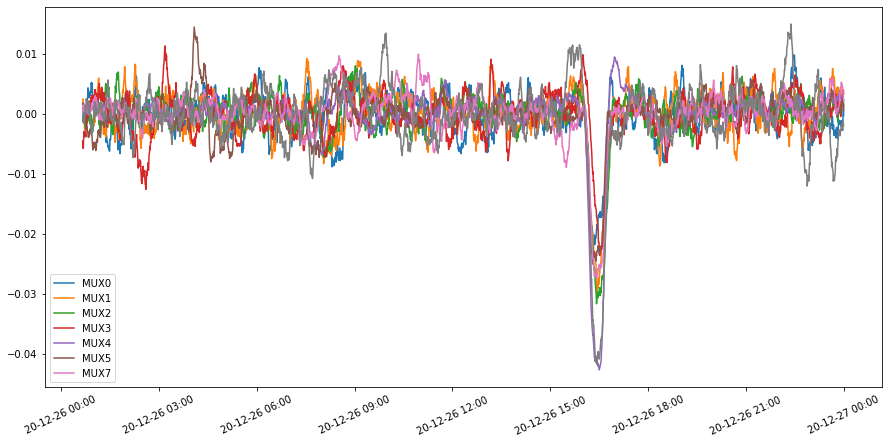

In [42]:
dd= signal.pct_change(periods=20).dropna()

plt.rcParams['figure.figsize'] = [15,7]
plt.rcParams['timezone'] = 'America/Sao_Paulo'

fig,ax = plt.subplots()
x = mdate.epoch2num(dd.index)
fmt = mdate.DateFormatter('%y-%m-%d %H:%M')

ax.xaxis.set_major_formatter(fmt)
plt.xticks( rotation=25 )
plt.plot_date(x, dd, linestyle='solid', marker='None')
muxes = ['MUX0','MUX1','MUX2','MUX3','MUX4','MUX5','MUX7']
plt.legend(muxes)
plt.show()


In [38]:
X = signal.index.to_numpy().reshape(-1, 1) 

MUX0  >> min_idx:  1885  min_value: -0.021902377972465525
[MUX 0 ] >> SCORE: 0.8124066720894011  ALPHA: 0.00030642482468592363


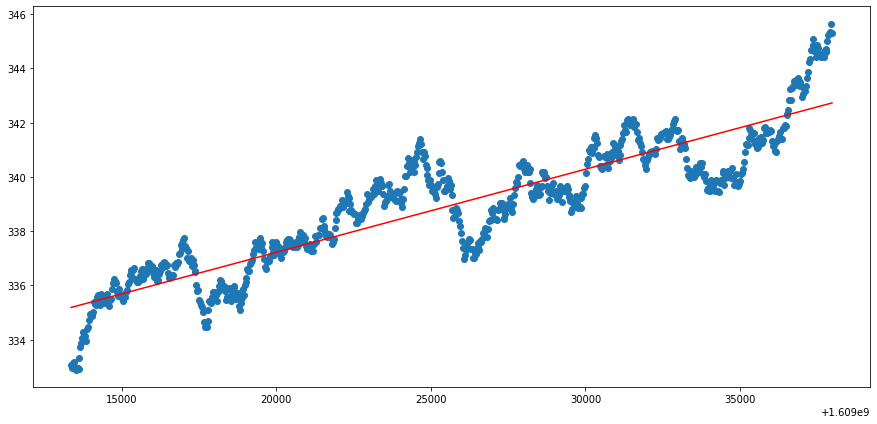

MUX1  >> min_idx:  1897  min_value: -0.029855705335105398
[MUX 1 ] >> SCORE: 0.5707562064930547  ALPHA: 0.00026574875238397734


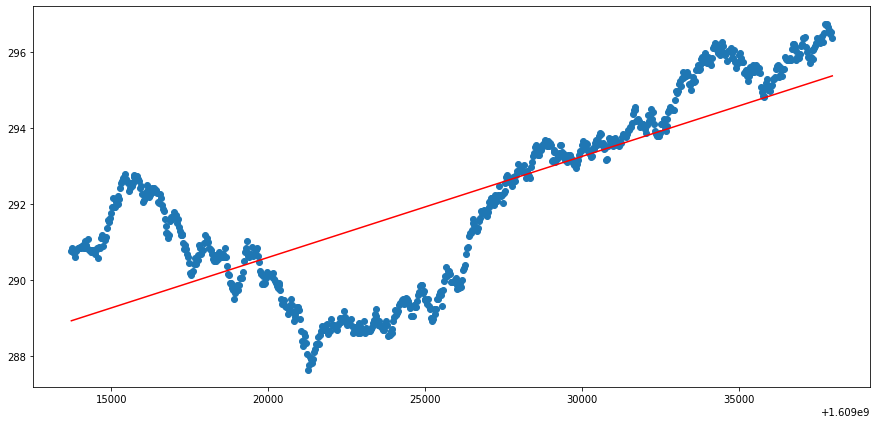

MUX2  >> min_idx:  1895  min_value: -0.03167565835158381
[MUX 2 ] >> SCORE: 0.3160376278784368  ALPHA: 0.0001846503408827751


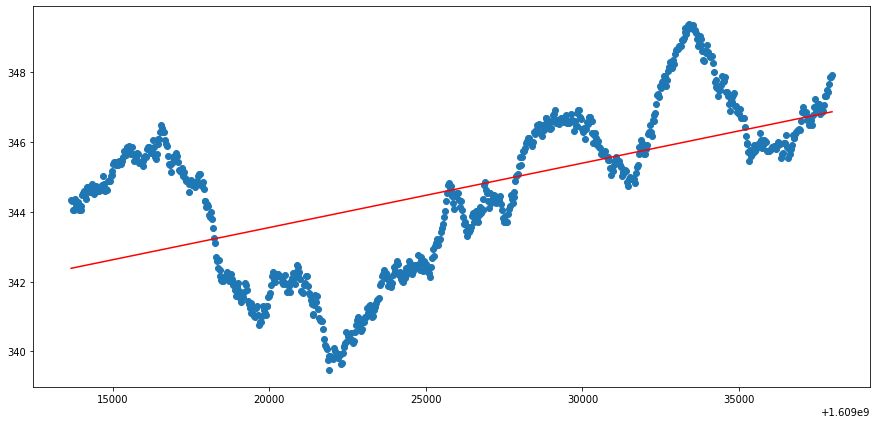

MUX3  >> min_idx:  1907  min_value: -0.023598271937566806
[MUX 3 ] >> SCORE: 0.6629456313295268  ALPHA: 0.00030861600141133784


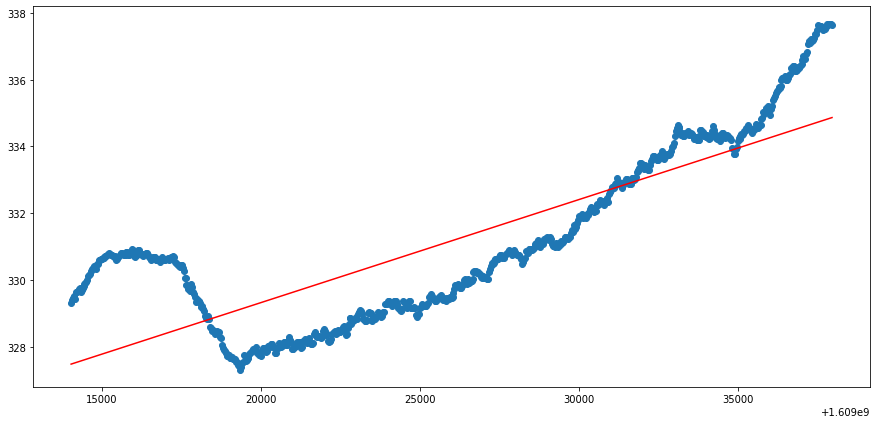

MUX4  >> min_idx:  1905  min_value: -0.04270186335403714
[MUX 4 ] >> SCORE: 0.9032524184747273  ALPHA: 0.000534159495577567


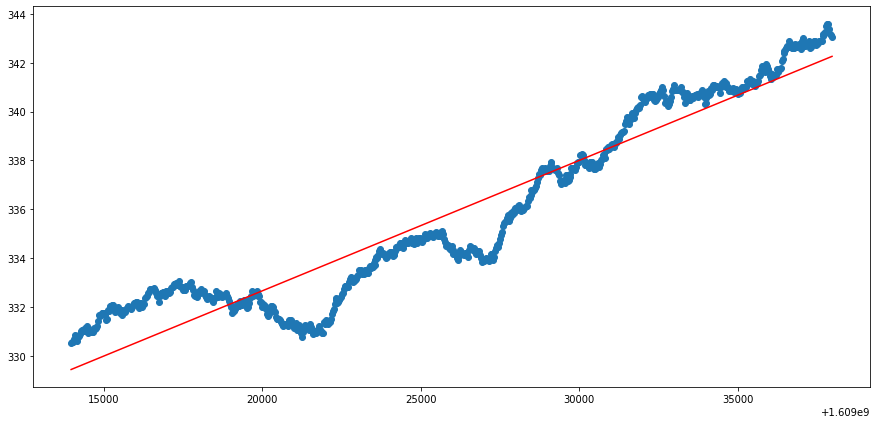

MUX5  >> min_idx:  1883  min_value: -0.025035294117647044
[MUX 5 ] >> SCORE: 0.6245832032689123  ALPHA: 0.00027807468878154987


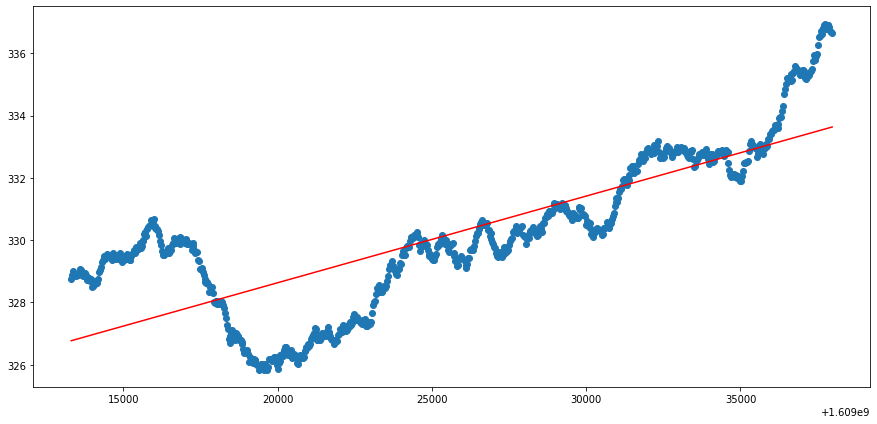

MUX7  >> min_idx:  1897  min_value: -0.041764958181428335
[MUX 6 ] >> SCORE: 0.6029783882883755  ALPHA: 0.00035747206379165524


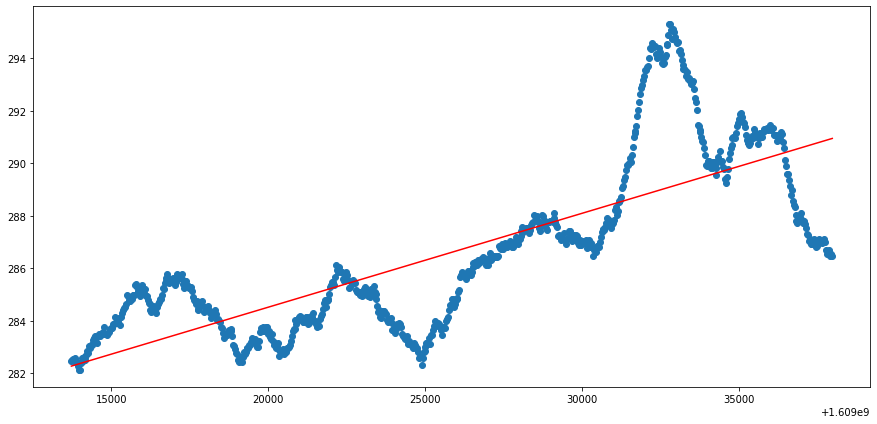

In [39]:
i=1
dd=dd.reset_index()

for mux in muxes:
    min_idx = dd[mux].idxmin()
    min_value = dd[mux][min_idx]
    print (mux, " >> min_idx: ", min_idx, " min_value:", min_value)
    
    Y = signal.iloc[:, i].values.reshape(-1, 1) 
    # display
    X_filtered = X[min_idx+2*HALF_HOUR:]
    Y_filtered = Y[min_idx+2*HALF_HOUR:]
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X_filtered, Y_filtered)  # perform linear regression
    Y_pred = linear_regressor.predict(X_filtered)  # make predictions
    print("[MUX",i-1,"] >> SCORE:", linear_regressor.score(X_filtered,Y_filtered),
          " ALPHA:", linear_regressor.coef_[0][0])
    plt.scatter(X_filtered, Y_filtered)
    plt.plot(X_filtered, Y_pred, color='red')
    plt.show()
    i=i+1
    #print (mux, " >> max_idx: ", max_idx, " max_value:", max_value)